# Python extensions

In [2]:
from pure_python import mandelbrot as man_pure_python
from numpy_vectorization import mandelbrot as man_numpy
from jit_compiled_numba import mandelbrot as man_numba
from ctypes_extension import mandelbrot as man_ctypes
from pybind11_extension import mandelbrot as man_pybind

import numpy as np
import matplotlib.pyplot as plt

In [3]:
def benchmark(func, plot=False):
    
    xmin = -0.74877
    xmax = -0.74872
    ymin = 0.065053
    ymax = 0.065103
    width = 1000
    height = 1000
    maxiter = 2048
    
    img = func(
        xmin = xmin,
        xmax = xmax,
        ymin = ymin,
        ymax = ymax,
        width = width,
        height = height,
        maxiter = maxiter,
    )
    if plot:
        fig, ax = plt.subplots(dpi=300)
        q = ax.imshow(img.T, cmap="hot", origin="lower")
        ax.set_xticks(np.linspace(0, width, 3))
        ax.set_yticks(np.linspace(0, height, 3))
        ax.set_xticklabels([f"{xi:.4e}" for xi in np.linspace(xmin, xmax, 3)])
        ax.set_yticklabels([f"{yi:.4e}" for yi in np.linspace(ymin, ymax, 3)])
        ax.set_xlabel("Real axis")
        ax.set_ylabel("Imaginary axis")
        cbar = fig.colorbar(q)
        cbar.set_label("Iterations")
        plt.show()
    return img

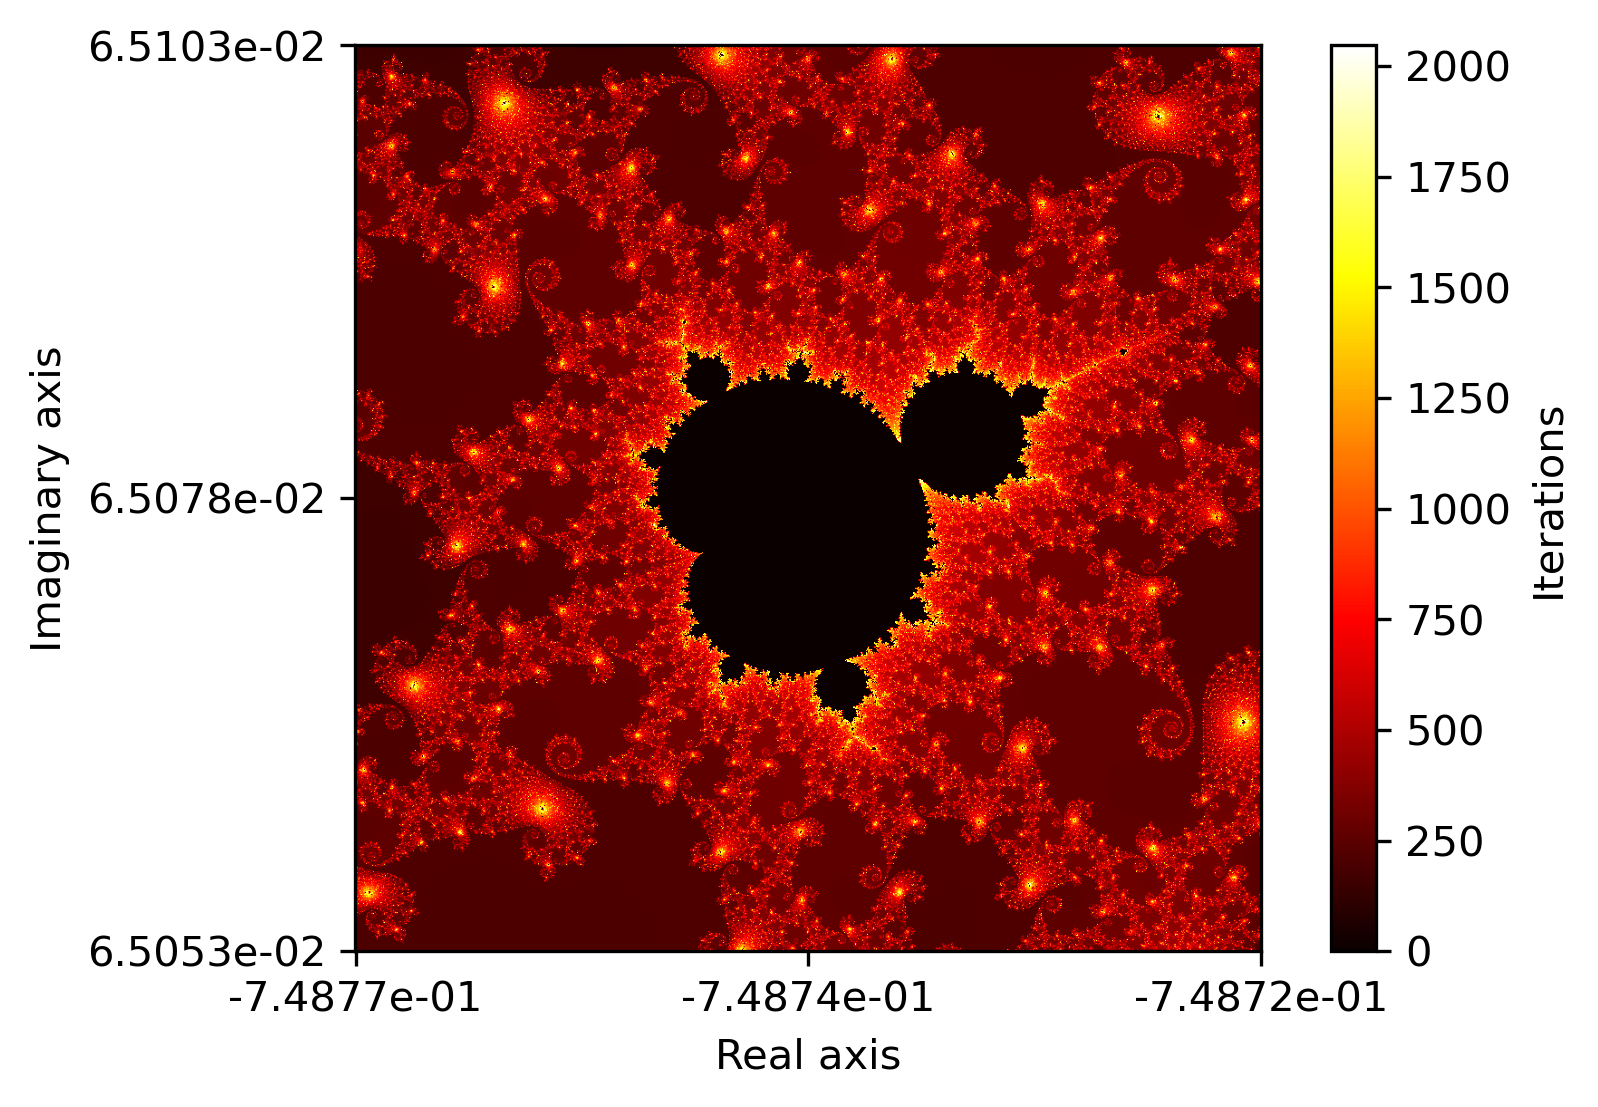

In [3]:
%matplotlib inline
img = benchmark(man_ctypes.mandelbrot_image, plot=True)

In [4]:
time_pure_python = %timeit -o -n 1 -r 1 benchmark(man_pure_python.mandelbrot_image)

4min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
time_numpy = %timeit -o benchmark(man_numpy.mandelbrot_image)

33.9 s ± 2.58 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
time_numba = %timeit -o benchmark(man_numba.mandelbrot_image)

3.42 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
time_ctypes = %timeit -o benchmark(man_ctypes.mandelbrot_image)

3.27 s ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
time_pybind = %timeit -o benchmark(man_pybind.mandelbrot_image)

3.33 s ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


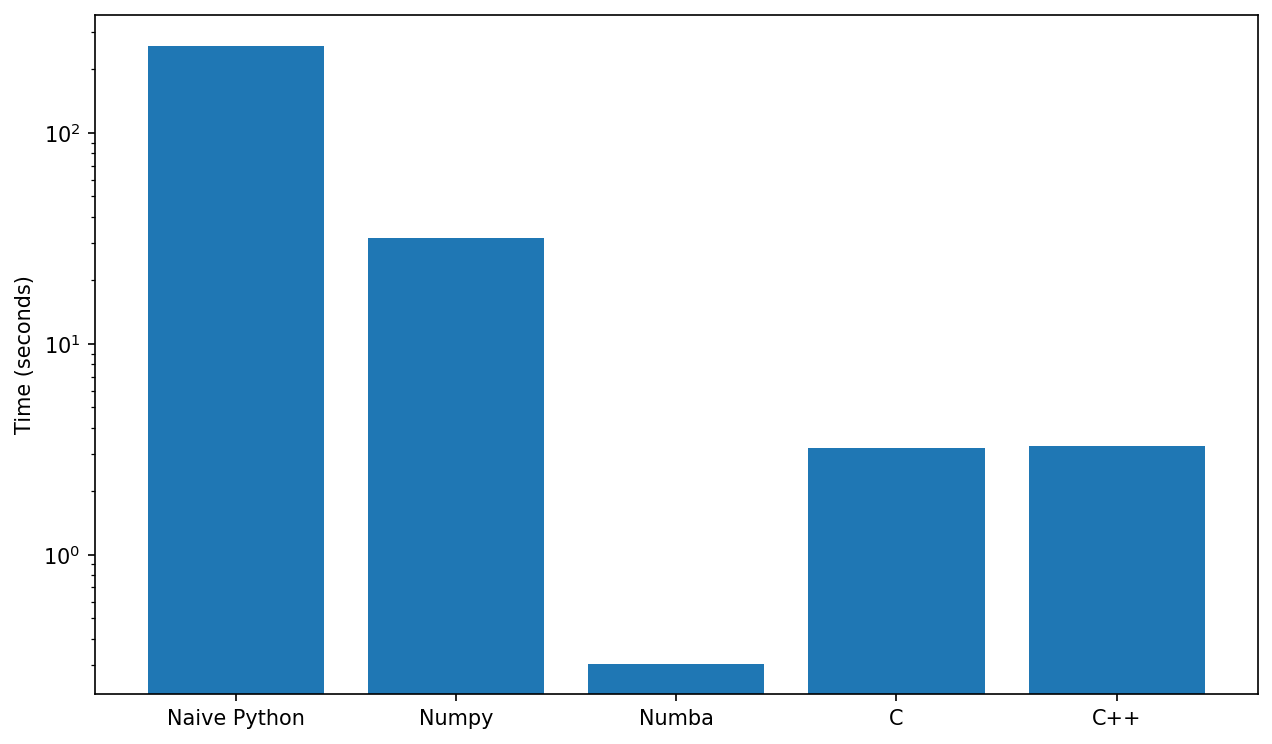

In [10]:
times = [time_pure_python.best, time_numpy.best, 
         time_numba.best, time_ctypes.best, time_pybind.best]
labels = ['Naive Python', 'Numpy', 'Numba', "C",'C++']

fig, ax = plt.subplots(dpi=150, figsize=(10, 6))
plt.bar(range(len(times)), times, log=True)
plt.xticks(range(len(times)), labels)
plt.ylabel('Time (seconds)')
plt.show()

In [5]:
time_numba_parallell = %timeit -o benchmark(man_numba.mandelbrot_image_paralell)

325 ms ± 4.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
